# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Putu Arka Adiana
- **Email:** arkaadiana.lit@gmail.com
- **ID Dicoding:** arka_adiana

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 : Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [192]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini, saya akan mengumpulkan data dari file `day.csv` yang berisi informasi penyewaan sepeda berdasarkan kondisi cuaca dan hari.

In [196]:
# Mengumpulkan Data
daily_bike_rentals_df = pd.read_csv('data/day.csv')
daily_bike_rentals_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [197]:
print(f"Jumlah baris: {len(daily_bike_rentals_df)}")

Jumlah baris: 731


**Insight:**
- Dataset berisi 731 baris dan 16 kolom, dengan informasi penyewaan sepeda harian, cuaca, dan karakteristik hari (misalnya hari kerja atau akhir pekan).
- Kolom cnt menunjukkan total jumlah penyewaan sepeda harian.

### Assessing Data

Disini saya akan memeriksa struktur dataset, mengecek apakah ada nilai yang hilang atau duplikasi.

In [201]:
# Menampilkan informasi umum tentang dataset
daily_bike_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [202]:
# Mengecek missing value
daily_bike_rentals_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [203]:
# Mengecek duplikasi data
print("Jumlah duplikasi: ", daily_bike_rentals_df.duplicated().sum())
daily_bike_rentals_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada nilai yang hilang dan tidak ada duplikasi data, sehingga data siap untuk dianalisis lebih lanjut tanpa perlu pembersihan tambahan.
- Statistik deskriptif menunjukkan bahwa:
    - Jumlah penyewaan sepeda (cnt) rata-rata adalah sekitar 4504 penyewaan per hari, dengan variasi yang cukup besar, yaitu antara 22 penyewaan (min) hingga 8714 penyewaan (max).
    - Sebagian besar hari memiliki cuaca yang baik (weathersit = 1) atau sedang, dengan sedikit hari yang memiliki cuaca buruk.
    - Temperatur rata-rata adalah 0.49 dalam skala normalisasi.

### Cleaning Data

Pada tahap ini, saya akan melakukan pembersihan data untuk memastikan bahwa data siap dianalisis lebih lanjut.

In [207]:
# Konversi kolom 'dteday' ke format datetime
daily_bike_rentals_df['dteday'] = pd.to_datetime(daily_bike_rentals_df['dteday'])

# Menghapus kolom yang tidak relevan
daily_bike_rentals_df.drop(columns=['instant'], inplace=True)

Setelah pembersihan, saya menampilkan beberapa baris pertama dari dataset untuk memverifikasi hasil pembersihan, dan juga menampilkan informasi umum tentang dataset untuk memastikan bahwa semua kolom relevan dan data sudah siap untuk dianalisis lebih lanjut.

In [209]:
# Menampilkan data setelah pembersihan
daily_bike_rentals_df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [210]:
# Menampilkan informasi tentang dataset setelah cleaning
daily_bike_rentals_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


**Insight:**
- Konversi `dteday` ke datetime berhasil, sehingga dapat menggunakan data tanggal dengan lebih mudah dalam analisis berbasis waktu.
- Kolom `instant` dihapus karena hanya berfungsi sebagai urutan numerik baris, yang tidak relevan untuk analisis lebih lanjut.
- Semua kolom memiliki data yang lengkap (tidak ada nilai hilang atau duplikasi), dan semua tipe data sudah sesuai, termasuk `dteday` yang telah dikonversi ke datetime.

## Exploratory Data Analysis (EDA)

### Explore daily_bike_rentals_df

In [214]:
# Menampilkan rangkuman statistik dari data penyewaan sepeda
daily_bike_rentals_df.describe(include='all')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [215]:
# Mengelompokkan data berdasarkan hari kerja (weekday)
data_group = daily_bike_rentals_df.groupby(by="weekday").agg({
    "cnt": ["mean", "min", "max", "std"]
})

# Menampilkan hasil kelompokkan rata-rata penyewaan berdasarkan hari kerja
data_group

cnt                         
                mean   min   max          std
weekday                                      
0        4228.828571   605  8227  1872.496629
1        4338.123810    22  7525  1793.074013
2        4510.663462   683  7767  1826.911642
3        4548.538462   441  8173  2038.095884
4        4667.259615   431  7804  1939.433317
5        4690.288462  1167  8362  1874.624870
6        4550.542857   627  8714  2196.693009

In [216]:
# Mengelompokkan data berdasarkan cuaca (weathersit)
cuaca_group = daily_bike_rentals_df.groupby('weathersit').agg({
    "cnt": ["mean", "max", "min", "std"]
})

# Menampilkan hasil pivot tabel cuaca
cuaca_group

cnt                        
                   mean   max  min          std
weathersit                                     
1           4876.786177  8714  431  1879.483989
2           4035.862348  8362  605  1809.109918
3           1803.285714  4639   22  1240.284449

In [217]:
# Menambahkan kolom is_weekend untuk mengetahui apakah hari itu adalah akhir pekan atau hari kerja
daily_bike_rentals_df['is_weekend'] = daily_bike_rentals_df['weekday'].apply(lambda x: 'Akhir Pekan' if x in [0, 6] else 'Hari Kerja')

# Mengelompokkan rata-rata penyewaan berdasarkan hari kerja atau akhir pekan
weekend_group = daily_bike_rentals_df.groupby('is_weekend').agg({
    "cnt": ["mean", "max", "min", "std"]
})

# Menampilkan hasil pengelompokan berdasarkan akhir pekan atau hari kerja
weekend_group


cnt                        
                    mean   max  min          std
is_weekend                                      
Akhir Pekan  4389.685714  8714  605  2042.527458
Hari Kerja   4550.566219  8362   22  1893.171210

**Insight:**
- Dari hasil pengelompokan data berdasarkan weathersit, dapat dilihat bahwa:
    - Cuaca cerah (weathersit = 1) memiliki rata-rata penyewaan sepeda tertinggi, yaitu sekitar 4876 penyewaan per hari.
    - Cuaca sedang (weathersit = 2) menunjukkan penurunan jumlah penyewaan sepeda dengan rata-rata 4053 penyewaan per hari.
    - Cuaca buruk (weathersit = 3) memiliki jumlah penyewaan terendah dengan rata-rata 1803 penyewaan per hari.
- Dari hasil pengelompokan data berdasarkan variabel is_weekend, dapat dilihat bahwa:
    - Pada akhir pekan, rata-rata penyewaan sepeda adalah 4389 penyewaan per hari dengan standar deviasi 2042.
    - Pada hari kerja, rata-rata penyewaan sepeda sedikit lebih tinggi yaitu 4550 penyewaan per hari dengan standar deviasi 1893.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Cuaca terhadap Penyewaan Sepeda

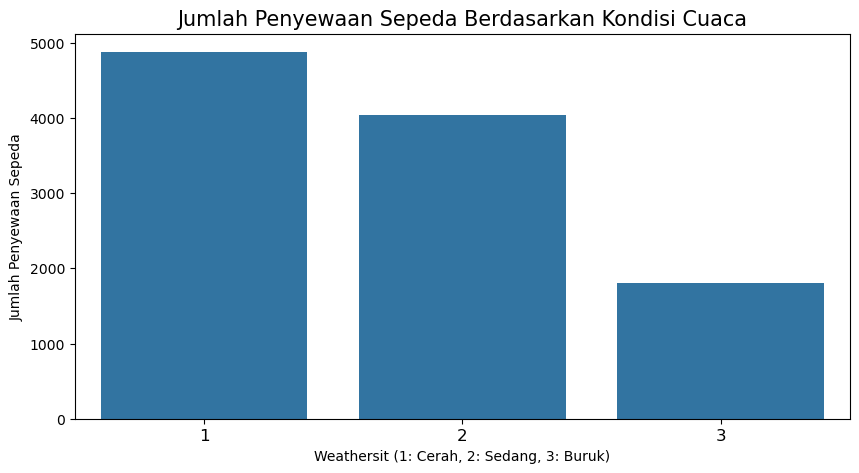

In [221]:
# Membuat visualisasi pengaruh cuaca terhadap penyewaan sepeda
plt.figure(figsize=(10, 5))

sns.barplot(
    y='cnt',
    x='weathersit',
    data=daily_bike_rentals_df.sort_values(by="cnt", ascending=False),
    errorbar=None
)

plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xlabel("Weathersit (1: Cerah, 2: Sedang, 3: Buruk)")
plt.tick_params(axis='x', labelsize=12)
plt.show()


**Insight:**
- Cuaca cerah (weathersit = 1) memiliki rata-rata penyewaan tertinggi dibandingkan cuaca yang lebih buruk.
- Cuaca buruk (weathersit = 3) menyebabkan penurunan signifikan dalam jumlah penyewaan sepeda.

### Pertanyaan 2: Hari Kerja vs Akhir Pekan

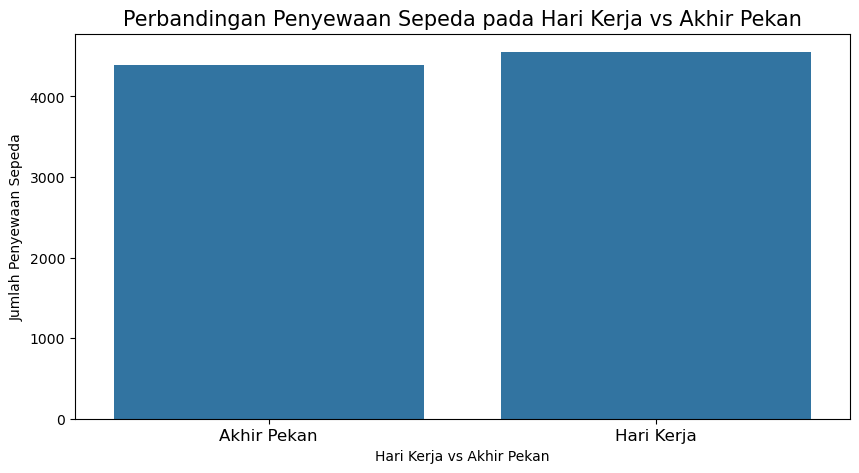

In [224]:
# Membuat visualisasi perbandingan hari kerja dan akhir pekan
plt.figure(figsize=(10, 5))

sns.barplot(
    x='is_weekend', 
    y='cnt', 
    data=daily_bike_rentals_df.sort_values(by="cnt", ascending=False), 
    errorbar=None
)

plt.title('Perbandingan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan', loc="center", fontsize=15)
plt.xlabel('Hari Kerja vs Akhir Pekan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.tick_params(axis='x', labelsize=12)
plt.show()


**Insight:**
- Rata-rata penyewaan sepeda pada hari kerja sedikit lebih tinggi daripada akhir pekan.
- Namun, perbedaannya tidak terlalu signifikan, sehingga sepeda digunakan untuk rekreasi maupun transportasi harian.

## Analisis Lanjutan (Opsional)

#### Menghitung Frekuensi (Jumlah penyewaan dalam kurun waktu tertentu) dan Monetary (Total penyewaan sepeda)

Pada langkah ini, saya menggunakan metode agregasi pada variabel season untuk menghitung beberapa informasi penting seperti total penyewaan sepeda, frekuensi penyewaan, dan rata-rata penyewaan untuk setiap musim.

In [229]:
# Menghitung Frekuensi (Jumlah penyewaan dalam kurun waktu tertentu) dan Monetary (Total penyewaan sepeda)

rfm = daily_bike_rentals_df.groupby('season').agg({
    'cnt': ['sum', 'count', 'mean']  # Monetary: sum, Frequency: count, Recency bisa diadaptasi sesuai waktu/hari terakhir
})

rfm.columns = ['Total_Penyewaan', 'Frekuensi_Penyewaan', 'Rata2_Penyewaan']
rfm = rfm.reset_index()

rfm


,season,Total_Penyewaan,Frekuensi_Penyewaan,Rata2_Penyewaan
0,1,471348,181,2604.132597
1,2,918589,184,4992.331522
2,3,1061129,188,5644.303191
3,4,841613,178,4728.162921


**Insight:**
- Pada musim ke-3, tercatat jumlah penyewaan sepeda tertinggi, dengan total penyewaan 1,061,129 sepeda.
- Musim ke-2 memiliki rata-rata penyewaan tertinggi.

#### Binning Berdasarkan Kecepatan Angin

Langkah ini bertujuan untuk membagi data berdasarkan kategori kecepatan angin menggunakan teknik binning. Saya membagi variabel windspeed ke dalam beberapa kelompok (bins) seperti sangat rendah, rendah, sedang, tinggi, dan sangat tinggi. Kemudian, saya menghitung rata-rata penyewaan sepeda untuk setiap kategori.

In [233]:
# Binning variabel windspeed (kecepatan angin)
bins = [0, 0.15, 0.3, 0.45, 0.6, 1]  # Definisikan rentang (bins) untuk kategori
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']  # Definisikan label untuk setiap kategori

# Membuat kolom baru 'windspeed_bin' dengan binning berdasarkan kecepatan angin
daily_bike_rentals_df['windspeed_bin'] = pd.cut(daily_bike_rentals_df['windspeed'], bins=bins, labels=labels)

# Menghitung rata-rata penyewaan sepeda berdasarkan kecepatan angin
windspeed_group = daily_bike_rentals_df.groupby('windspeed_bin', observed=False).agg({'cnt': 'mean'}).reset_index()

# Menampilkan hasil
windspeed_group


,windspeed_bin,cnt
0,Sangat Rendah,4932.000000
1,Rendah,4449.123487
2,Sedang,3362.171429
3,Tinggi,1635.000000
4,Sangat Tinggi,NaN


**Insight:**
- Penyewaan tertinggi terjadi pada kecepatan angin yang sangat rendah, dengan rata-rata 4,932 penyewaan.
- Pada kategori "Sangat Tinggi", tidak ada data penyewaan sepeda yang tercatat, sehingga menghasilkan nilai NaN.

## Conclusion

- **Conclution pertanyaan 1 (Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?)**

    - Cuaca memberikan dampak yang signifikan terhadap jumlah penyewaan sepeda. Ketika cuaca cerah (dengan kode weathersit = 1), rata-rata jumlah penyewaan sepeda mencapai angka tertinggi, yaitu sekitar 4.876 penyewaan per hari. Sebaliknya, ketika cuaca memburuk (weathersit = 3), jumlah penyewaan sepeda mengalami penurunan drastis dengan rata-rata hanya 1.083 penyewaan per hari. Dengan demikian, dapat disimpulkan bahwa semakin buruk kondisi cuaca, semakin rendah pula jumlah penyewaan sepeda.
  
- **Conclution pertanyaan 2 (Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan?)**
  - Berdasarkan analisis, rata-rata penyewaan sepeda pada hari kerja lebih tinggi dibandingkan akhir pekan. Pada hari kerja, jumlah rata-rata penyewaan mencapai 4.550 penyewaan per hari, sedangkan pada akhir pekan rata-rata penyewaan sedikit lebih rendah, yaitu sekitar 4.389 penyewaan per hari. Meskipun perbedaannya tidak terlalu signifikan, hasil ini menunjukkan bahwa aktivitas penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan, yang mungkin disebabkan oleh penggunaan sepeda sebagai alat transportasi untuk bekerja atau beraktivitas.